# Exercise 1 : Gradient descent for linear regression
## a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe ?
### Imports

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

### Load Data

In [49]:
dataset = pd.read_csv('lausanne-appart.csv')
y = dataset.rent_price.values
X = dataset.living_area.values

### MSE Loss function

In [50]:
def mse_loss(y, y_hat):
    diff = y - y_hat
    total = sum([i ** 2 for i in diff])
    return total / (2 * len(y))

### Gradient Descent and predict function

In [51]:
def predic(X, thetas):
    return thetas[0] + thetas[1] * X


# Full batch gradient descent
def gradient(X, y, log = True):
    N = len(X)
    alpha = 0.000001
    theta_0 = X[0]
    theta_1 = 1
    costs = []
    epsilon = 0.001
    while True:
        costs.append(mse_loss(y, predic(X, [theta_0, theta_1])))
        theta_0 = theta_0 - (alpha * 1 / N) * sum([predic(X[i], [theta_0, theta_1]) - y[i] for i in range(0, N)])
        theta_1 = theta_1 - (alpha * 1 / N) * sum(
            [(predic(X[i], [theta_0, theta_1]) - y[i]) * X[i] for i in range(0, N)])
        if len(costs) > 1:
            learning_improvement = (costs[-2] - costs[-1]) / costs[-1]
            if log:
                print("Learning rate: " + str(learning_improvement))
            if learning_improvement < epsilon:
                break

    costs.append(mse_loss(y, predic(X, [theta_0, theta_1])))

    return costs, theta_0, theta_1

### Calling functions for question 1.a

Learning rate: 0.016209659135942155
Learning rate: 0.01619731045683852
Learning rate: 0.016184771476926305
Learning rate: 0.016172039580176586
Learning rate: 0.01615911212492992
Learning rate: 0.01614598644398953
Learning rate: 0.016132659844744685
Learning rate: 0.016119129609302615
Learning rate: 0.016105392994627574
Learning rate: 0.016091447232720206
Learning rate: 0.016077289530785396
Learning rate: 0.016062917071440502
Learning rate: 0.016048327012934665
Learning rate: 0.016033516489379666
Learning rate: 0.016018482611011506
Learning rate: 0.016003222464467278
Learning rate: 0.015987733113079355
Learning rate: 0.015972011597199996
Learning rate: 0.01595605493453215
Learning rate: 0.015939860120503916
Learning rate: 0.015923424128646366
Learning rate: 0.015906743911006955
Learning rate: 0.015889816398579816
Learning rate: 0.015872638501769898
Learning rate: 0.015855207110871322
Learning rate: 0.015837519096582573
Learning rate: 0.01581957131053946
Learning rate: 0.0158013605858810

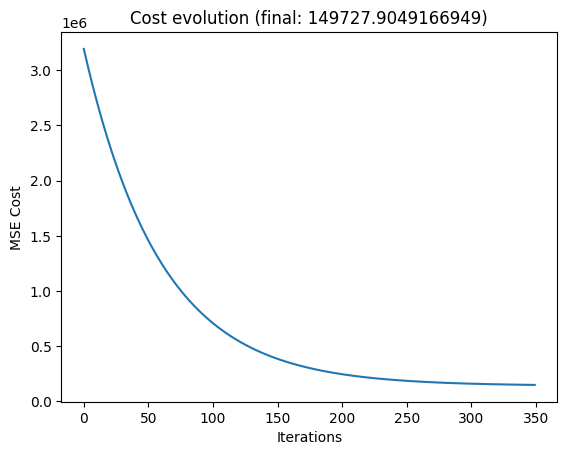

In [52]:
def ex_1_a():
    costs, theta_0, theta_1 = gradient(X, y)
    plt.plot(range(len(costs)), costs)
    plt.xlabel("Iterations")
    plt.ylabel("MSE Cost")
    plt.title(f'Cost evolution (final: {costs[-1]})')
    plt.show()

ex_1_a()

We observe that the more iterations we have, less the cost is. The cost is decreasing exponentially.
At first, the cost is very high, it decreases very quickly, to finally stabilize at a low value. Doing more iterations would not change the cost much.

## b) Imagine a stopping criterion, i.e. when do we stop iterating on the training set ?

As a stop criterion, we use the epsilon value. If the learning rate is less than epsilon, we stop the gradient descent.
`if learning_improvement < epsilon:`

## c) Plot the computed line hθ(x) on top of the scatter plot of exercise 1.

Learning rate: 0.016209659135942155
Learning rate: 0.01619731045683852
Learning rate: 0.016184771476926305
Learning rate: 0.016172039580176586
Learning rate: 0.01615911212492992
Learning rate: 0.01614598644398953
Learning rate: 0.016132659844744685
Learning rate: 0.016119129609302615
Learning rate: 0.016105392994627574
Learning rate: 0.016091447232720206
Learning rate: 0.016077289530785396
Learning rate: 0.016062917071440502
Learning rate: 0.016048327012934665
Learning rate: 0.016033516489379666
Learning rate: 0.016018482611011506
Learning rate: 0.016003222464467278
Learning rate: 0.015987733113079355
Learning rate: 0.015972011597199996
Learning rate: 0.01595605493453215
Learning rate: 0.015939860120503916
Learning rate: 0.015923424128646366
Learning rate: 0.015906743911006955
Learning rate: 0.015889816398579816
Learning rate: 0.015872638501769898
Learning rate: 0.015855207110871322
Learning rate: 0.015837519096582573
Learning rate: 0.01581957131053946
Learning rate: 0.0158013605858810

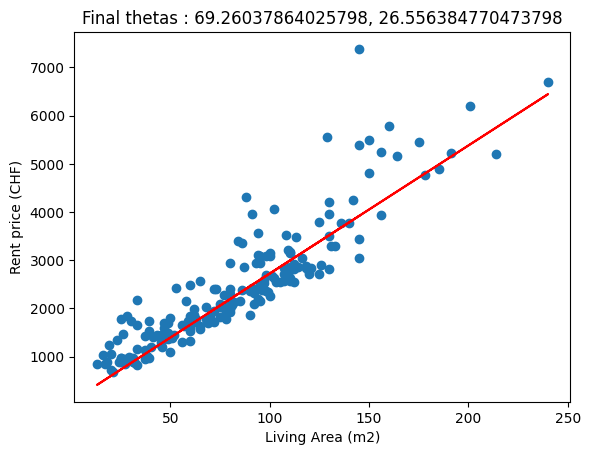

In [53]:
def ex_1_c():
    costs, theta_0, theta_1 = gradient(X, y)
    plt.scatter(X, y)
    plt.plot(X, predic(X, [theta_0, theta_1]), color='red')
    plt.xlabel("Living Area (m2)")
    plt.ylabel("Rent price (CHF)")
    plt.title(f'Final thetas : {theta_0}, {theta_1}')
    plt.show()

ex_1_c()

## d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2. What can you conclude ?

In [54]:
def ex_1_d():
    costs, theta_0, theta_1 = gradient(X, y, log=False)
    print(f'Final cost : {costs[-1]}')

ex_1_d()

Final cost : 149727.9049166949


We conclude that the cost is lower with the normal equation than with the gradient descent. This is because the normal equation is a closed form solution, while the gradient descent is an iterative solution. The normal equation is more precise than the gradient descent. But the gradient descent is more efficient, because invert a matrix is more expensive than doing a few iterations.

# Exercice 2

## Stochastic gradient descent

In [55]:
def stochastic_gradient(X, y, log = True):
    N = len(X)
    alpha = 0.000001
    theta_0 = X[0]
    theta_1 = 1
    costs = []
    epsilon = 1e-6
    last_costs = 0
    while True:
        last_costs = np.mean(costs)
        costs.append(mse_loss(y, predic(X, [theta_0, theta_1])))
        mean_loss = np.mean(costs)
        n = random.randrange(0, N)
        theta_0 = theta_0 - alpha * (predic(X[n], [theta_0, theta_1]) - y[n])
        theta_1 = theta_1 - alpha * (predic(X[n], [theta_0, theta_1]) - y[n]) * X[n]
        if len(costs) > 1:
            learning_improvement = abs(last_costs - mean_loss) / last_costs
            if log:
                print("Learning rate: " + str(learning_improvement))
            if learning_improvement < epsilon:
                break
    return costs, theta_0, theta_1


## a) Plot the computed line hθ(x) on top of the scatter plot of exercise 1.

Learning rate: 0.016209659135942155
Learning rate: 0.01619731045683852
Learning rate: 0.016184771476926305
Learning rate: 0.016172039580176586
Learning rate: 0.01615911212492992
Learning rate: 0.01614598644398953
Learning rate: 0.016132659844744685
Learning rate: 0.016119129609302615
Learning rate: 0.016105392994627574
Learning rate: 0.016091447232720206
Learning rate: 0.016077289530785396
Learning rate: 0.016062917071440502
Learning rate: 0.016048327012934665
Learning rate: 0.016033516489379666
Learning rate: 0.016018482611011506
Learning rate: 0.016003222464467278
Learning rate: 0.015987733113079355
Learning rate: 0.015972011597199996
Learning rate: 0.01595605493453215
Learning rate: 0.015939860120503916
Learning rate: 0.015923424128646366
Learning rate: 0.015906743911006955
Learning rate: 0.015889816398579816
Learning rate: 0.015872638501769898
Learning rate: 0.015855207110871322
Learning rate: 0.015837519096582573
Learning rate: 0.01581957131053946
Learning rate: 0.0158013605858810

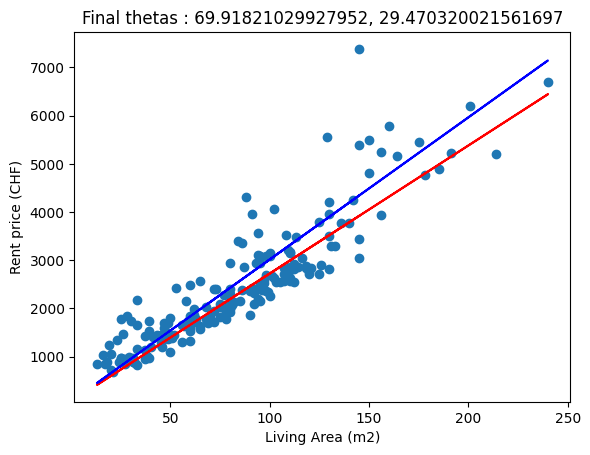

In [60]:
def ex_2_a():
    costs_stoch, theta_0_stoch, theta_1_stoch = stochastic_gradient(X, y, False)
    costs, theta_0, theta_1 = gradient(X, y)
    plt.plot(X, predic(X, [theta_0, theta_1]), color='red', label='Gradient')
    plt.scatter(X, y)
    plt.plot(X, predic(X, [theta_0_stoch, theta_1_stoch]), color='blue', label='Stochastic')
    plt.xlabel("Living Area (m2)")
    plt.ylabel("Rent price (CHF)")
    plt.title(f'Final thetas : {theta_0_stoch}, {theta_1_stoch}')
    plt.show()

ex_2_a()

## b) How many samples do you need to visit for reaching the convergence ?
We need to visit 18540 samples to reach the convergence.

## c) What kind of stopping criterion could we use here ?
We used the avrage cost of iteration `i-1` minus the cost of iteration `i` divided by the cost of iteration `i-1`. If the result is less than epsilon, we stop the gradient descent.

## d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2 and 3. What can you conclude ?

In [57]:
def ex_2_d():
    costs_stoch, theta_0_stoch, theta_1_stoch = stochastic_gradient(X, y, False)
    print(f'Final cost {costs_stoch[-1]}')

ex_2_d()

Final cost 150890.00452657603


We conclude that the cost is higher than every other costs. This is because the stochastic gradient descent is not precise. It is more efficient than the gradient descent, but it is less precise. With the stochastic gradient descent, we can handle a lot of data, but it's less precise because in the gradient descent, we use the whole data, while in the stochastic gradient descent, we use only one sample.

# Exercice 3

### a) The linear regression has a mathematical closed form solution. Then, in which conditions would we prefer a gradient descent algorithm to compute the regression model ?
When we have big datasets and we can't compute the normal equation, we prefer a gradient descent algorithm to compute the regression model.

### b) Outliers in a data set can be defined as values that are out of the "usual" range in comparison with other values. They typically come from noise or anomalies in the data capturing process. What is the impact of an outlier in the stochastic gradient descent process ? What if we have many outliers ? Hint : look at the equation of the MSE, and to the equation of the update rule.

If we're not lucky and in our batch and we only have extreme values, we'll calculate a gradient that is not representative of the whole dataset. It will lead to a bad convergence. If we have many outliers, we'll have a bad convergence too.

### c) In the case of stochastic gradient descent, what is the danger of having a too large or too small α value ? Could you think of a better (more advanced) strategy as the one stated in Slide 36 ?

If we have a too large α value, we'll have a bad convergence. If we have a too small α value, we'll have a bad convergence too. We can use a learning rate decay to have a better convergence.

### d) Let’s assume we expect that the target variable y has a dependency to the square and to the cube of one of the feature xd in our multi-variable training set (x1, . . . , xd, . . . , xD). How would you proceed ? Do we need to take precautions in terms of numerical stability ?
Let's assume we have a feature `x1` and we want to add `x1^2` and `x1^3` as features. We can add them to our dataset and then we can use the normal equation to compute the regression model. We must be aware of a potential integer overflow.

### e) Advanced. Could we use a descent algorithm without computing the gradient ? If yes, give a pseudo code of the algorithm to find (θ0, θ1) using a linear regression hθ(x) = θ0 + θ1x.
Yes, we can use a descent algorithm without computing the gradient.
For example, we can compute all the combinations possible for every parameters ± alpha and then we can choose the best one, according to the cost function.

```python
# Pseudo code for 2 parameters
# 6 available coordinates (3x2)

# 1. Compute all the combinations possible for every parameters ± alpha
# 2. Compute the cost for each combination
# 3. Choose the best one
# 4. If the best was the same as the previous one, stop

def compute(theta_0, theta_1, alpha):
    result = []
    params = []
    for i in range(-1, 1):
        for j in range(-1, 1):
            params.append([theta_0 + alpha * i, theta_1 + alpha * j])
            result.append(mse_loss(y, predic(X, [theta_0 + alpha * i, theta_1 + alpha * j])))

    # sort the result and params
    result, params = zip(*sorted(zip(result, params)))

    if params[0] == [theta_0, theta_1]:
        return params[0], result[0]
    else:
        return compute(params[0][0], params[0][1], alpha)
```